# 9F_diff_tissue

6/17/21

number of times the df in the correct tissue has the same config in other tissues

In [1]:
import pandas as pd
import os, glob
import seaborn as sns; sns.set_style('whitegrid')
import matplotlib.pyplot as plt

In [2]:
diff_df = pd.read_csv('../data/processed/mpra/results_df_diff_tissue.csv',index_col=0)
print(diff_df.columns)
diff_df.tissue.unique()

Index(['vocab_tissue', 'A431', 'COLO', 'Colon', 'GM', 'KCD6', 'MC', 'vocab',
       'tissue'],
      dtype='object')


array(['GDSD6', 'MM', 'SCC', 'Colon', 'GM12878', 'Melanocytes'],
      dtype=object)

In [3]:
diff_df.columns = ['vocab_tissue', 'SCC','MM','Colon','GM12878','GDSD6','Melanocytes','vocab','tissue']

diff_df[:5]

,vocab_tissue,SCC,MM,Colon,GM12878,GDSD6,Melanocytes,vocab,tissue
0,ARID5B::KLF5+GDSD6,other,other,other,other,other,other,ARID5B::KLF5,GDSD6
1,ARID5B::LEF1+MM,AND,other,AND,AND,other,AND,ARID5B::LEF1,MM
2,ARID5B::NFE2L1+MM,other,other,other,other,other,other,ARID5B::NFE2L1,MM
3,ARID5B::SOX10+MM,OR,OR,OR,OR,OR,OR,ARID5B::SOX10,MM
4,ARID5B::STAT1+MM,other,other,other,other,other,other,ARID5B::STAT1,MM


In [4]:
def count_overlap(row):
#     print(row)
    correct_class = row[row['tissue']]
    class_arr = list(row[['GDSD6', 'MM', 'SCC', 'Colon', 'GM12878', 'Melanocytes']])
    return class_arr.count(correct_class)

    

Text(0.5, 0, 'number of tissues with shared configuration')

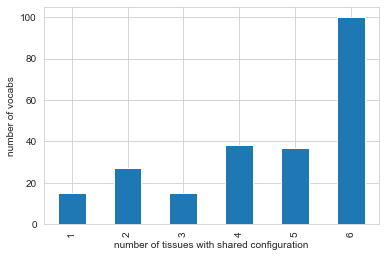

In [12]:
diff_df['num_corr_classes'] = diff_df.apply(count_overlap,axis=1)

# sns.histplot(diff_df['num_corr_classes'])
ax = diff_df['num_corr_classes'].value_counts().sort_index().plot.bar()
ax.set_ylabel('number of vocabs')
ax.set_xlabel('number of tissues with shared configuration')

In [8]:
print(diff_df['num_corr_classes'].value_counts())
diff_df['num_corr_classes'].shape[0]

6    100
4     38
5     37
2     27
3     15
1     15
Name: num_corr_classes, dtype: int64


232